In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import io
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import seaborn as sns

In [4]:
plt.rc('font', family='NanumBarunGothic') 

데이터 불러오기

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
data=pd.concat([train, test], axis=0)

In [6]:
data=data.reset_index(drop=True)

In [7]:
data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


출근자 수 칼럼 추가

In [8]:
data['출근자수']=data['본사정원수']-data['본사출장자수']-data['본사휴가자수']-data['현본사소속재택근무자수']

In [9]:
data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,출근자수
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0


공휴일 유무가 식수에 영향을 미칠 것이라고 예상하여 공휴일 전 날 칼럼 생성

In [10]:
data['공휴일전날']=0

data['공휴일전날'][4]=1 #'16 설연휴
data['공휴일전날'][17]=1 #삼일절
data['공휴일전날'][47]=1 #국회의원 선거
data['공휴일전날'][62]=1 #어린이날
data['공휴일전날'][67]=1 #석가탄신일
data['공휴일전날'][152]=1 #추석연휴
data['공휴일전날'][245]=1 #'17 설연휴
data['공휴일전날'][264]=1 #'17 삼일절
data['공휴일전날'][309]=1 # 석가탄신일
data['공휴일전날'][310]=1 #'17 어린이날
data['공휴일전날'][330]=1 #'17 현충일
data['공휴일전날'][379]=1 #'17 광복절
data['공휴일전날'][502]=1 #'18 설연휴
data['공휴일전날'][510]=1 #'18 삼일절
data['공휴일전날'][552]=1 #'18 근로자의 날
data['공휴일전날'][555]=1 #'18 어린이날
data['공휴일전날'][565]=1 #'18 석가탄신일
data['공휴일전날'][575]=1 #'18 현충일
data['공휴일전날'][579]=1 #'18 지방선거
data['공휴일전날'][623]=1 #'18 광복절
data['공휴일전날'][650]=1 #'18 추석연휴
data['공휴일전날'][651]=1 #'18 한글날
data['공휴일전날'][705]=1 #'18 성탄절
data['공휴일전날'][709]=1 #'19 신정
data['공휴일전날'][732]=1 #'19 설연휴
data['공휴일전날'][748]=1 #'19 삼일절
data['공휴일전날'][790]=1 #'19 근로자의 날
data['공휴일전날'][814]=1 #'19 현충일
data['공휴일전날'][863]=1 #'19 광복절
data['공휴일전날'][882]=1 #'19 추석연휴
data['공휴일전날'][894]=1 #'19 개천절
data['공휴일전날'][897]=1 #'19 한글날
data['공휴일전날'][951]=1 #'19 성탄절
data['공휴일전날'][955]=1 #'20 신정
data['공휴일전날'][971]=1 #'20 설연휴
data['공휴일전날'][995]=1 #'20 삼일절
data['공휴일전날'][1027]=1 #'20 국회의원선거
data['공휴일전날'][1037]=1 #'20 석가탄신일
data['공휴일전날'][1038]=1 #'20 어린이날
data['공휴일전날'][1061]=1 #'20 현충일
data['공휴일전날'][1099]=1 #'20 광복절
data['공휴일전날'][1129]=1 #'20 추석연휴
data['공휴일전날'][1133]=1 #'20 한글날
data['공휴일전날'][1187]=1 #'20 성탄절

data['공휴일전날'][1215]=1 #'21 설연휴
data['공휴일전날'][1225]=1 #'21 삼일절

EDA: 요일별 출근자 수와 중식계 scatterplot

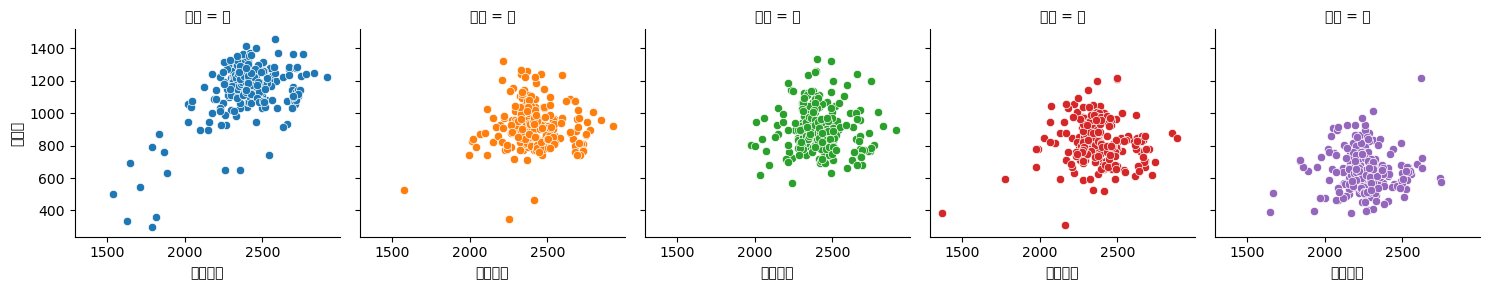

In [12]:
grid = sns.FacetGrid(data=data, col='요일', hue = '요일')
grid.map(sns.scatterplot, '출근자수', '중식계')

요일별 야근자수와 석식계의 scatterplot 

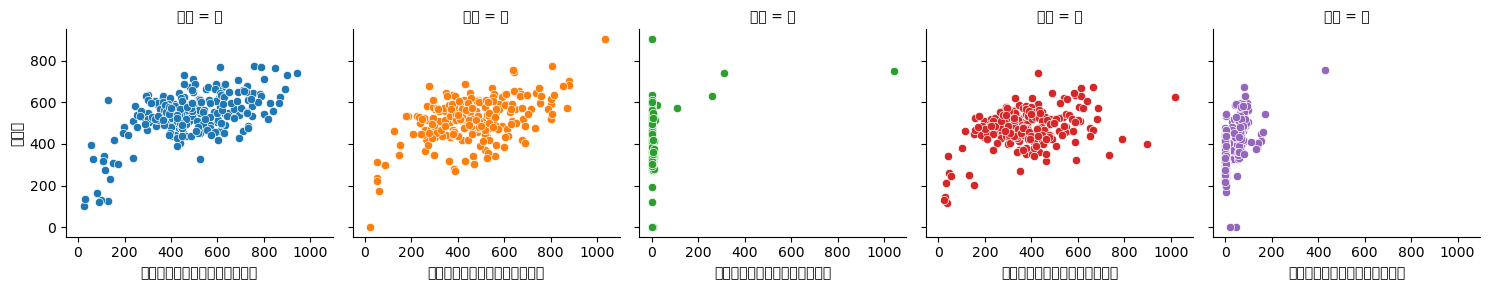

In [13]:
grid = sns.FacetGrid(data=data, col='요일', hue = '요일')
grid.map(sns.scatterplot, '본사시간외근무명령서승인건수', '석식계')

요일별 중식계와 석식계의 scatterplot

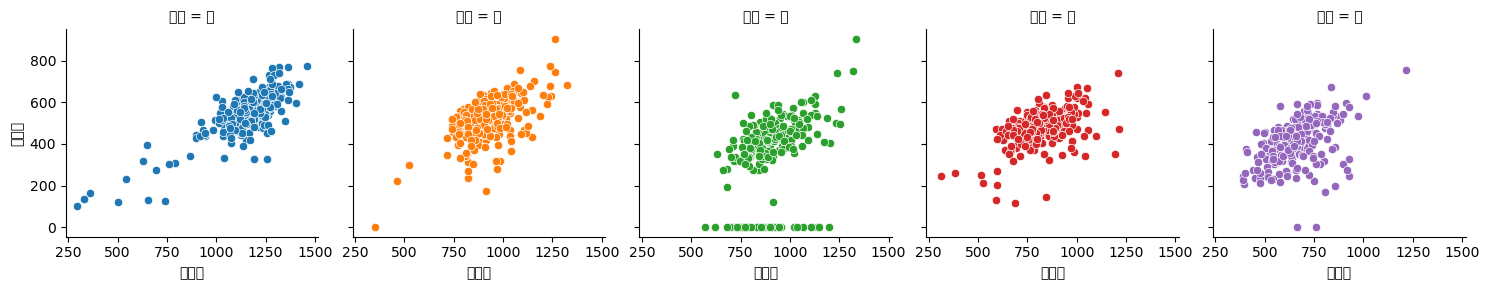

In [14]:
grid = sns.FacetGrid(data=data, col='요일', hue = '요일')
grid.map(sns.scatterplot, '중식계', '석식계')

공휴일 전날과 중식계의 scatterplot

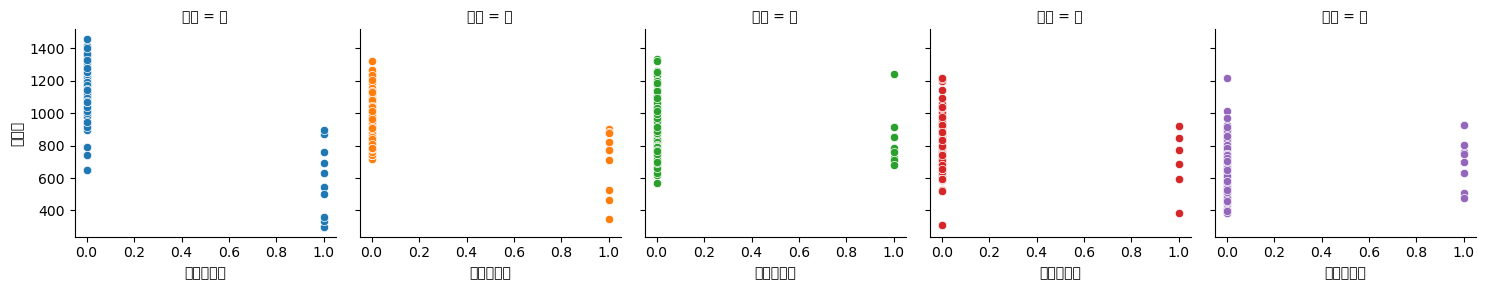

In [17]:
grid = sns.FacetGrid(data=data, col='요일', hue = '요일')
grid.map(sns.scatterplot, '공휴일전날', '중식계')

공휴일 전날과 석식계의 scatterplot

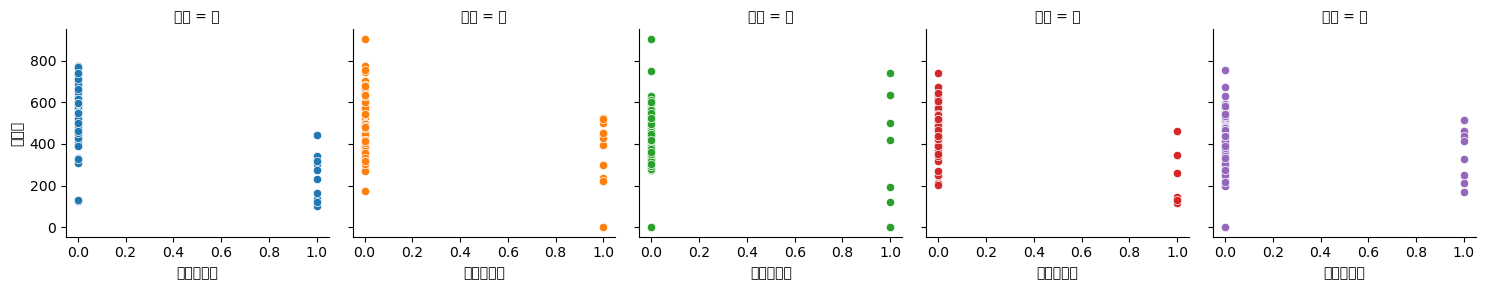

In [16]:
grid = sns.FacetGrid(data=data, col='요일', hue = '요일')
grid.map(sns.scatterplot, '공휴일전날', '석식계')

중식계 시각화

<AxesSubplot:>

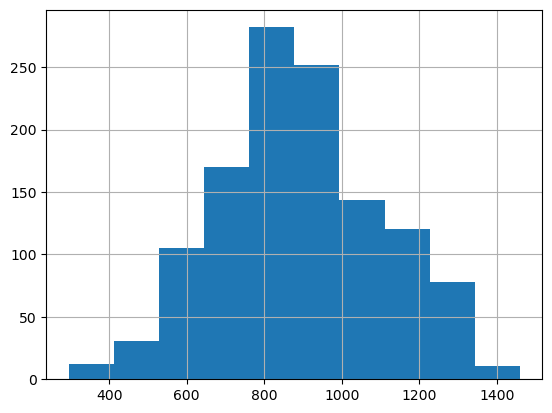

In [18]:
data['중식계'].hist()

석식계 시각화

<AxesSubplot:>

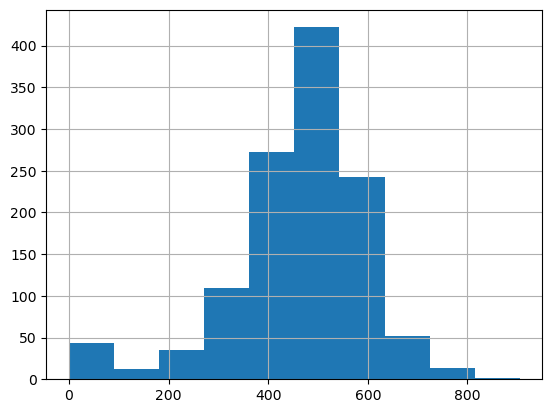

In [26]:
data['석식계'].hist()

공휴일 전날과 석식계 plot

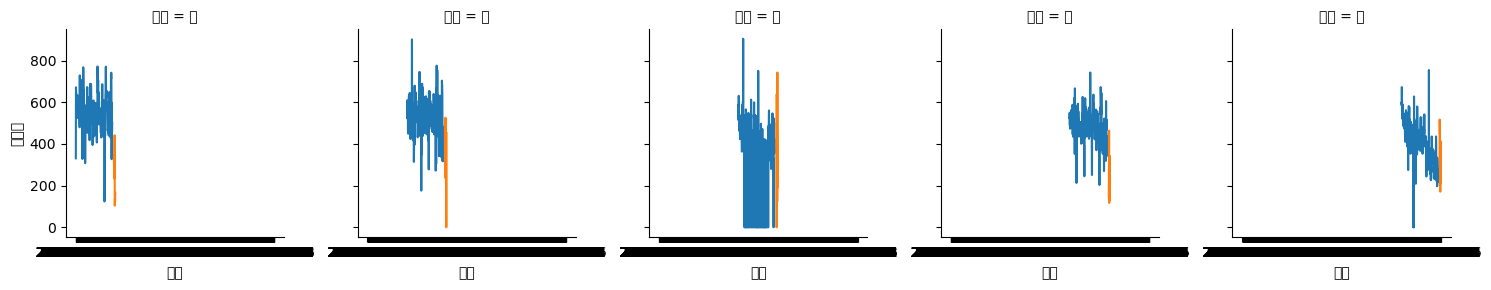

In [27]:
grid = sns.FacetGrid(data=data, col='요일', hue = '공휴일전날')
grid.map(plt.plot, '일자', '석식계')

야근자수와 석식계의 scatterplot, 공휴일 전날 

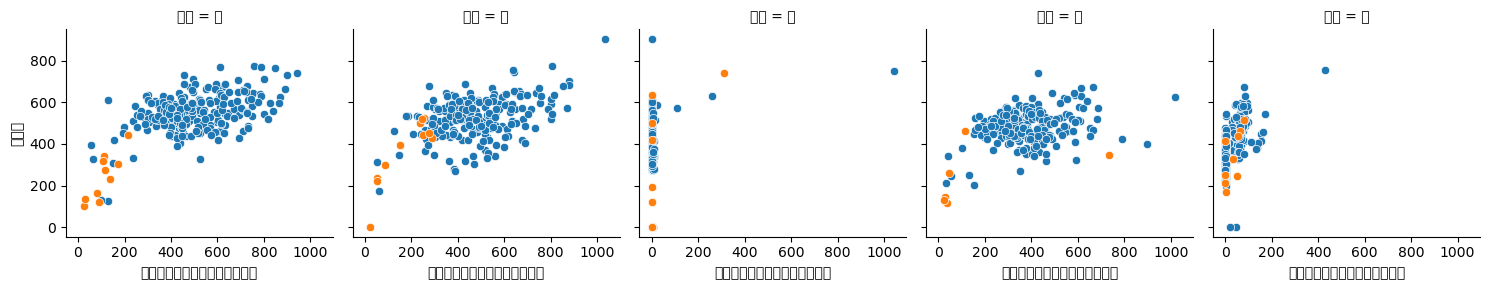

In [25]:
grid = sns.FacetGrid(data=data, col='요일', hue = '공휴일전날')
grid.map(sns.scatterplot, '본사시간외근무명령서승인건수', '석식계')